In [48]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt("Daten/mundharm.csv", skiprows=2, delimiter=',')
signal = data[:,1]


Text(0, 0.5, 'Spannung in mV')

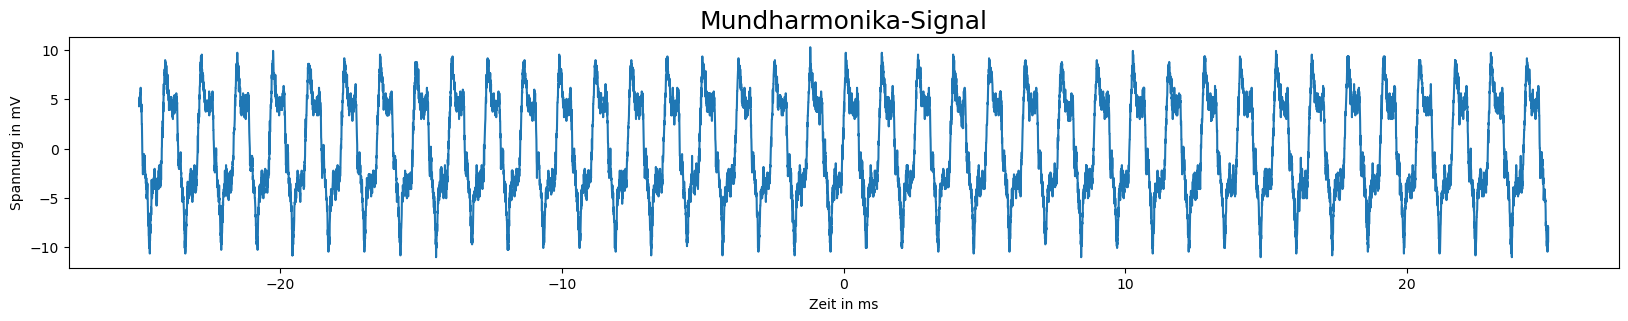

In [19]:
fig, ax = plt.subplots(figsize=(20,3))

ax.plot(data[:,0], data[:,1])
ax.set_title("Mundharmonika-Signal", fontsize=18)
ax.set_xlabel("Zeit in ms")
ax.set_ylabel("Spannung in mV")

# Teilausschnitt

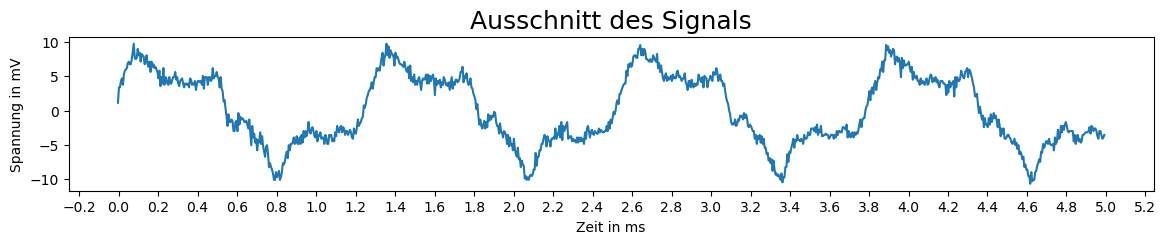

In [18]:
fig, ax = plt.subplots(figsize=(14,2))

ax.set_title("Ausschnitt des Signals", fontsize=18)
ax.set_xlabel("Zeit in ms")
ax.set_ylabel("Spannung in mV")
ax.locator_params(axis="x", nbins=40)
ax.plot(data[5000:6000,0], data[5000:6000,1])

In [46]:
Grundperiode = 1.25 # ms
Grundfrequenz = 1/(Grundperiode / 1000) # Hz
Signaldauer = np.round((np.abs(data[0,0]) + np.abs(data[-1,0])) / 1000, 4) # s
Abtastintervall = Signaldauer / data.shape[0] # Dauer zwischen Abtastpunkten in Sekunden
Abtastfrequenz = 1/Abtastintervall # Abtastpunkte in Hz
Signallaenge = signal.size

print("Grundperiode =", Grundperiode, "ms")
print("Grundfrequenz =", Grundfrequenz, "Hz")
print("Signaldauer =", Signaldauer, "s")
print("Signaldauer =", Signaldauer * 1000, "ms")
print("Abtastintervall =", Abtastintervall, "s")
print("Abtastintervall =", Abtastintervall * 1000, "ms")
print("Abtastfrequenz =", Abtastfrequenz, "Hz") 
print("Signallänge =", Signallaenge, "Abtastpunkte") # Anzahl der Abtastzeitpunkte

Grundperiode = 1.25 ms
Grundfrequenz = 800.0 Hz
Signaldauer = 0.05 s
Signaldauer = 50.0 ms
Abtastintervall = 4.998500449865041e-06 s
Abtastintervall = 0.0049985004498650405 ms
Abtastfrequenz = 200060.0 Hz
Signallänge = 10003 Abtastpunkte


(0.0, 10003.0)

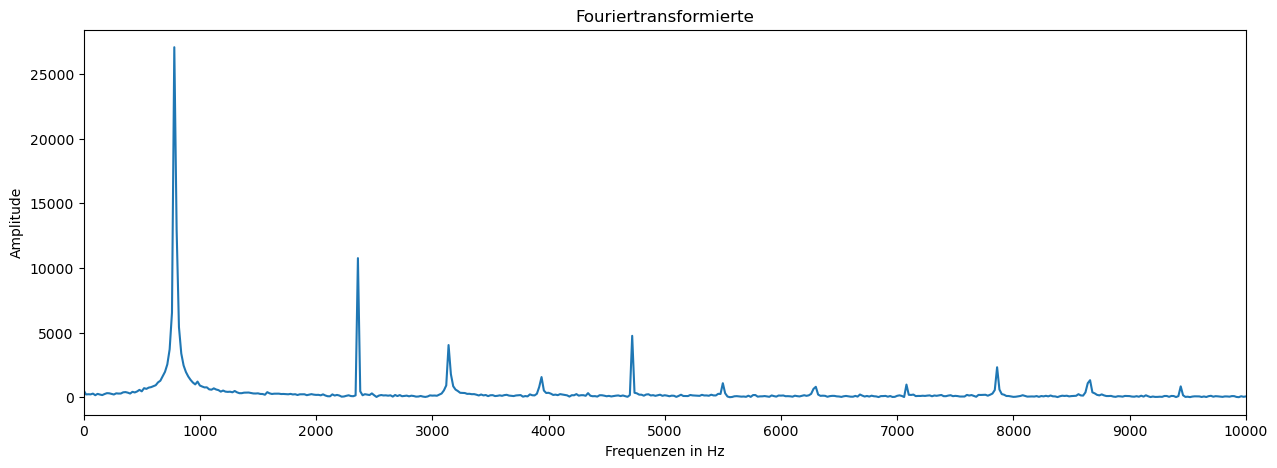

In [96]:
 # nächstgrößere 2er potzen
F = np.fft.fft(signal)
# Umrechnung des Spektrums in Herz

F_hertz = []

for n, freq in enumerate(F):
    F_hertz.append(n/(Signallaenge*Abtastintervall))
F_hertz = np.array(F_hertz) 

fig, ax = plt.subplots(figsize=(15,5))

ax.set_title("Fouriertransformierte")
ax.set_xlabel("Frequenzen in Hz")
ax.set_ylabel("Amplitude")
ax.plot(F_hertz[:len(F_hertz) // 2], np.abs(F[:len(F) // 2]))
ticks2 = np.arange(0, len(F_hertz), 1000)
ax.set_xticks(ticks2)
plt.xlim(0, len(F_hertz))

Alternative

Grundfrequenz: 25594.42485096364 mV, 793.695068359375 Hz


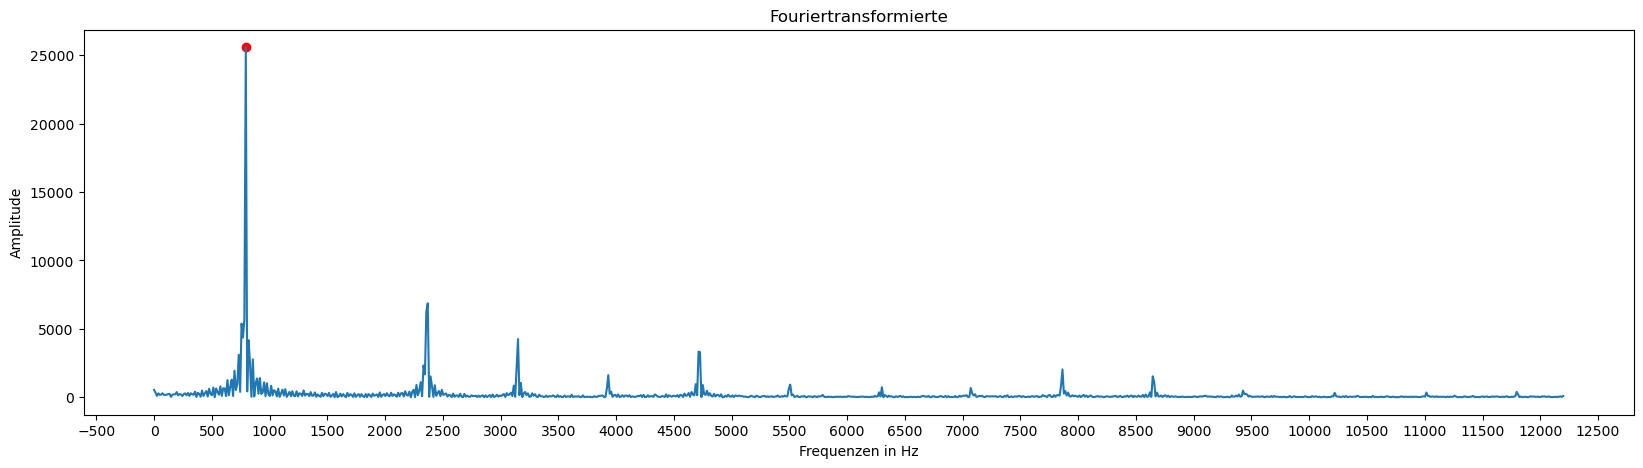

In [119]:
next_best_size = n=2 ** int(np.ceil(np.log2(Signallaenge)))
F = np.fft.fft(signal, next_best_size)
freq = np.fft.fftfreq(next_best_size, d=Abtastintervall)

fig, ax = plt.subplots(figsize=(20, 5))

freqc = freq[:1000]
Fc = F.real[:1000]
ax.set_title("Fouriertransformierte")
ax.set_xlabel("Frequenzen in Hz")
ax.set_ylabel("Amplitude")
ax.locator_params(axis="x", nbins=40)
ax.plot(freqc, np.abs(Fc))

max_index = np.argmax(np.abs(F.real[0:-1]))
mV, Hz = np.max(F.real[0:-1]), np.abs(freq)[0:-1][max_index]
print("Grundfrequenz:", mV, "mV,", Hz, "Hz")

ax.scatter(Hz, mV, color='r')

# 2. Frequenzgang von Lautsprechen